<a href="https://colab.research.google.com/github/SofiNurul/uts/blob/main/Analisis_Sentiment_Produk_Penghilang_Bekas_Luka_Menggunakan_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from collections import Counter
from tqdm import tqdm
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from wordcloud import WordCloud
from sklearn.ensemble import AdaBoostClassifier

Mengunduh resource nltk yang diperlukan

In [107]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Muat dataset

In [108]:
df = pd.read_csv('Datalatih_sentiment_shopee.csv', encoding='MacRoman')

Daftar stopwords dari NLTK dan tambahan khusus Bahasa Indonesia

In [109]:
stopwords_tambahan = list([
    'gk', 'yg', 'nya', 'dan', 'dll', 'saja', 'juga', 'untuk', 'dengan', 'atau',
    'tapi', 'karena', 'seperti', 'yang', 'saya', 'ga', 'malah', 'tidak', 'lagi',
    'ini', 'di', 'kok', 'aja', 'gak', 'jadi', 'ya', 'dah', 'bisa', 'ada', 'bgt',
    'banget', 'kak', 'ituu', 'grgr', 'jd', 'pengen', 'dgn', 'udah', 'klo', 'tp',
    'pa', 'udh', 'karin', 'bgtt', 'ig', 'po', 'tau', 'utk', 'karna', 'brangnya',
    'ngk', 'kyk', 'sy', 'tp', 'uda', 'nga', 'dngn', 'kalo', 'gamau', 'becak', 'kya',
    'sma', 'jdi', 'ad', 'lg', 'pa', 'huhu', 'dpt', 'gel', 'b', 'jg', 'rb', 'hehe',
    'pdhl', 'dr', 'ku', 'sih', 'ka', 'kyk', 'sy', 'bli', 'skali', 'dikrim', 'berharap',
    'kirim', 'jdi', 'pkai', 'penjual', 'brangnya', 'becak', 'tpi', 'blum', 'bgin','akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara',
    'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal',
    'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan',
    'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya',
    'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini',
    'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja',
    'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir',
    'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal',
    'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali',
    'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung',
    'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama',
    'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur',
    'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa',
    'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya',
    'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam',
    'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan',
    'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi',
    'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan',
    'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan',
    'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui',
    'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan',
    'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah',
    'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan',
    'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan',
    'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini',
    'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan',
    'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan',
    'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak',
    'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari',
    'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat',
    'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini',
    'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan',
    'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya',
    'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun',
    'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena',
    'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan',
    'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar',
    'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian',
    'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira',
    'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya',
    'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka',
    'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa',
    'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan',
    'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan',
    'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan',
    'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai',
    'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti',
    'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi',
    'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai',
    'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat',
    'mengingatkan'
])

Inisialisasi Lemmatizer

In [110]:
lemmatizer = WordNetLemmatizer()

Fungsi untuk membersihkan teks

In [111]:
def bersihkan_teks(teks):
    if not isinstance(teks, str):  # Memeriksa apakah teks adalah string
        return ""  # Mengembalikan string kosong jika bukan teks

    teks = teks.lower()  # Mengubah teks menjadi huruf kecil
    teks = re.sub(r'http\S+|www\S+|https\S+', '', teks)  # Menghapus URL
    teks = re.sub(r'[^\x00-\x7F]+', ' ', teks)  # Menghapus karakter non-ASCII
    teks = teks.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    teks = re.sub(r'\d+', '', teks)  # Menghapus angka
    kata_kata = teks.split()  # Memisahkan teks menjadi kata
    teks_bersih = ' '.join([lemmatizer.lemmatize(kata) for kata in kata_kata if kata not in stopwords_tambahan])  # Lemmatization dan hapus stopwords
    return teks_bersih

Terapkan fungsi pembersihan pada kolom 'content'

In [112]:
df['cleaned_content'] = df['content'].apply(bersihkan_teks)

Kamus subjektivitas dengan kategori intensitas dan polaritas emosional

In [113]:
# Definisikan daftar kata-kata positif dan negatif yang digabungkan
positif = [
    'pembebasan', 'penghargaan', 'altruistik', 'luar biasa', 'hebat', 'inspiratif', 'bagus',
    'puas', 'baik', 'suka', 'keren', 'bagus sekali', 'cepat', 'efektif', 'cocok', 'manjur',
    'ampuh', 'berhasil', 'kepuasan', 'kekaguman', 'gembira', 'menerima', 'berlimpah', 'makmur',
    'aliansi', 'kondusif', 'sederhana', 'semoga', 'semoga cocok', 'bahagia', 'senang', 'syukur',
    'bersemangat', 'lega', 'bangga', 'optimis', 'prestasi', 'pencapaian', 'menang', 'berkembang',
    'memperbaiki', 'produktif', 'menghargai', 'mengagumi', 'mendukung', 'percaya', 'mencintai',
    'memuji', 'setia', 'nyaman', 'damai', 'tenteram', 'harmonis', 'berkelimpahan', 'dermawan',
    'empati', 'peduli', 'ramah', 'murah hati', 'kebebasan', 'keterbukaan', 'kesempatan', 'harapan',
    'stabil', 'terjamin', 'tenang', 'penyelesaian', 'penyembuhan', 'pemulihan', 'penanggulangan',
    'solusi', 'peningkatan', 'sukses', 'berhasil', 'penuh kasih', 'inovasi', 'berkat', 'semoga berhasil'
]

negatif = [
    'pelecehan', 'kekejian', 'ketakutan', 'kekhawatiran', 'penindasan', 'frustrasi', 'buruk',
    'tidak puas', 'jelek', 'kecewa', 'payah', 'lambat', 'rusak', 'kotor', 'gagal', 'mengecewakan',
    'mahal', 'pecah', 'cuek', 'jutek', 'penyok', 'sampah', 'pelit', 'kurang', 'tidak bermanfaat',
    'bingung', 'parah', 'kurang cocok', 'expired', 'hancur', 'menghapuskan', 'kecanduan',
    'terasing', 'terbatas', 'kekurangan', 'tersendat', 'marah', 'jengkel', 'sedih', 'benci',
    'gelisah', 'stres', 'putus asa', 'gusar', 'penghinaan', 'kekerasan', 'penghinaan', 'bullying',
    'konflik', 'kerugian', 'kebangkrutan', 'kekalahan', 'kerusakan', 'tidak berhasil', 'melemah',
    'terganggu', 'penyalahgunaan', 'terjangkit', 'kritis', 'cacat', 'krisis', 'kemiskinan',
    'pengangguran', 'kesulitan', 'kesusahan', 'hambatan', 'ketidakpercayaan', 'isolasi',
    'permusuhan', 'egois', 'mencemarkan', 'mempersulit', 'membatasi', 'mengurangi', 'mengancam',
    'terpaksa', 'terkekang', 'tertindas', 'terancam', 'tidak berkembang'
]


Fungsi untuk menetapkan sentimen berdasarkan kamus subjektivitas yang digabungkan

In [114]:
def aturan_sentimen(teks):
    teks = teks.lower()
    if any(kata in teks for kata in positif):
        return 'positive'
    elif any(kata in teks for kata in negatif):
        return 'negative'
    else:
        return 'neutral'

Terapkan aturan sentimen

In [115]:
df['sentiment'] = df['cleaned_content'].apply(aturan_sentimen)

Hitung jumlah sampel per kelas untuk melihat distribusi

In [116]:
print(df['sentiment'].value_counts())

sentiment
positive    770
neutral     368
negative     36
Name: count, dtype: int64


Menampilkan beberapa hasil contoh sentimen

In [123]:
sample_results = df[['content', 'sentiment']].head(15)
print(sample_results)

                                              content sentiment
0   Pertama kali coba karena baca ulasan di Quora ...  positive
1   Penasaran bgt dari dulu udah laser jg bekas lu...  positive
2   Udah ku pke beberapa kali sih, semoga bermanfa...  positive
3                                       Mudahan cocok  positive
4                        Barang sesuai pesanan ‚ò∫Ô∏è   neutral
5   Baru pertama kali coba mudah mudahan bisa puda...  positive
6   Baru mau nyoba, semoga manjur menghilangkan be...  positive
7   Cottonbud gak dikasih, pelit banget, gimana pa...  negative
8   Alhamdulillah Paketku sudah sampai pesanannya ...  positive
9   Dikasih thr sama kakaknya, MasyaAllah berkah s...   neutral
10      Baru mau dicoba semoga hasilnya bagus makasih  positive
11  Belom dicoba, mohon doanya smg keloid saya sem...   neutral
12  Kecepatan pengiriman standar, kualitas produk ...  positive
13  Bagus Banget üò≠ bisa ngilangin bekas luka di...  positive
14                                      

Vektorisasi menggunakan TF-IDF dengan unigram, bigram, dan trigram

In [131]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),      # unigram, bigram, trigram
    max_df=0.75,             # maksimum dokumen yang mengandung kata
    min_df=3,                # minimum dokumen yang mengandung kata
    stop_words=stopwords_tambahan,  # stopwords khusus
    max_features=5000        # (opsional) batas maksimum fitur
)
X_labeled = vectorizer.fit_transform(df_labeled['cleaned_content'])
y_labeled = df_labeled['sentiment']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['berkali', 'kali', 'nanti', 'sama', 'siap', 'tanya', 'turut'] not in stop_words.
  warnings.warn(


Pisahkan data menjadi data latih dan data uji

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42, stratify=y_labeled)

Terapkan SMOTE untuk menangani ketidakseimbangan data hanya pada data latih

In [133]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Hasilkan distribusi kelas setelah SMOTE untuk memastikan keseimbangan

In [134]:
from collections import Counter
print("Distribusi kelas sebelum SMOTE:", Counter(y_train))
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))

Distribusi kelas sebelum SMOTE: Counter({'positive': 616, 'neutral': 294, 'negative': 29})
Distribusi kelas setelah SMOTE: Counter({'positive': 616, 'neutral': 616, 'negative': 616})


# **Model : Naive Bayes**

---



Melatih model Naive Bayes dengan GridSearchCV untuk menemukan parameter terbaik

In [135]:
param_grid_nb = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='f1_macro')
grid_search_nb.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='f1_macro')

Simpan model terbaik

In [136]:
best_nb_model = grid_search_nb.best_estimator_
print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)

Best Parameters for Naive Bayes: {'alpha': 0.0001}


Prediksi pada data uji menggunakan model terbaik

In [142]:
y_pred = best_nb_model.predict(X_test)

Evaluasi hasil

In [143]:
print("=== Laporan Klasifikasi ===")
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

    negative       0.08      0.14      0.10         7
     neutral       0.89      0.46      0.61        74
    positive       0.79      0.94      0.86       154

    accuracy                           0.77       235
   macro avg       0.59      0.51      0.52       235
weighted avg       0.80      0.77      0.76       235

Akurasi: 0.7659574468085106


Confusion matrix

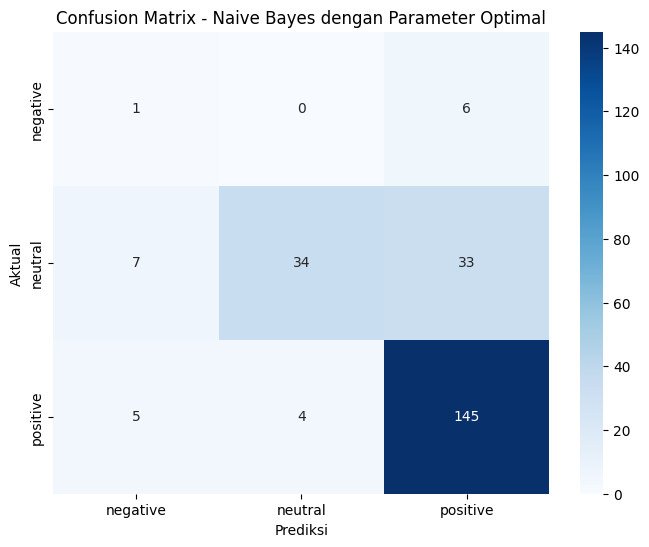

In [145]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_nb_model.classes_, yticklabels=best_nb_model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Naive Bayes dengan Parameter Optimal')
plt.show()

Hitung Precision, Recall, F1-score per kelas

In [146]:
metrics = precision_recall_fscore_support(y_test, y_pred, average=None, labels=best_nb_model.classes_)
metric_df = pd.DataFrame({
    'Kelas Sentimen': best_nb_model.classes_,
    'Precision': metrics[0],
    'Recall': metrics[1],
    'F1-score': metrics[2]
})

Plot Precision, Recall, F1-score

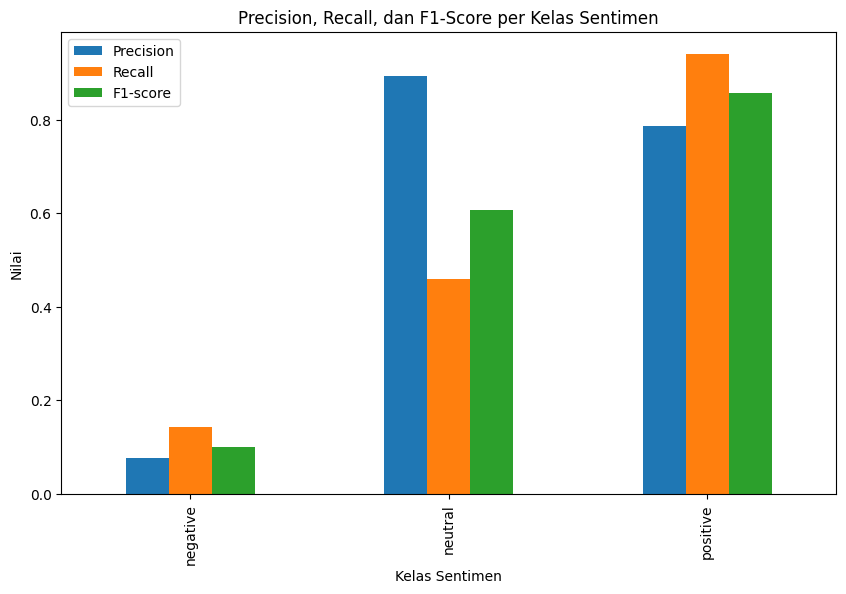

In [147]:
metric_df.set_index('Kelas Sentimen').plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, dan F1-Score per Kelas Sentimen")
plt.ylabel("Nilai")
plt.show()

Distribusi Sentimen Bar Chart

<ipython-input-149-fffd8b015634>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


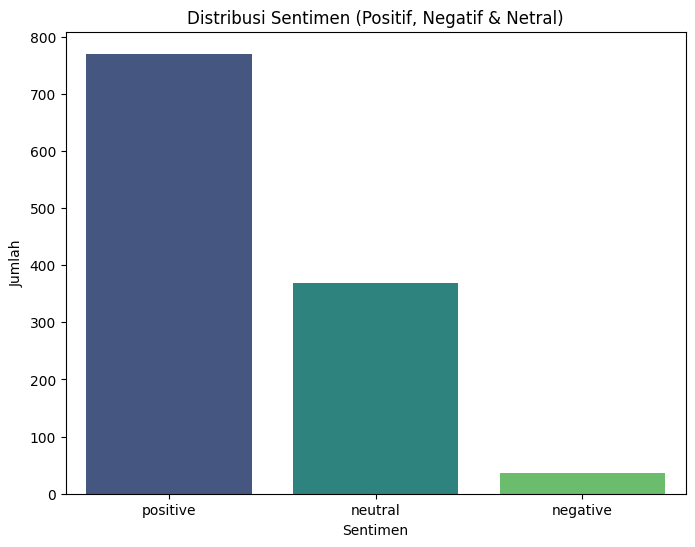

In [149]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen (Positif, Negatif & Netral)')
plt.show()

Distribusi Sentimen Pie Chart

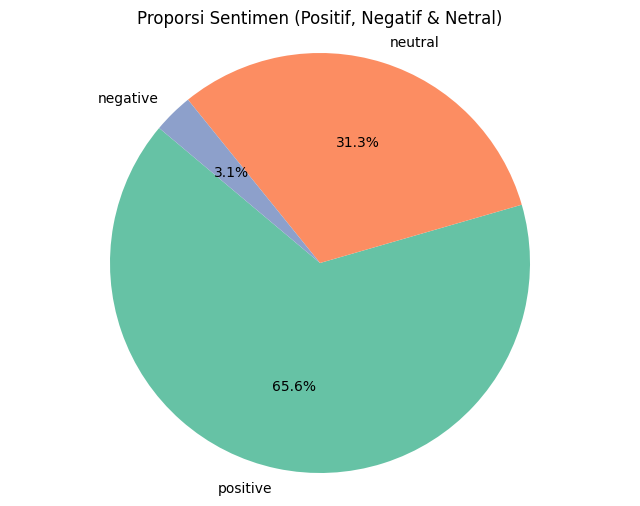

In [150]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.axis('equal')  # Agar pie chart menjadi bulat
plt.title('Proporsi Sentimen (Positif, Negatif & Netral)')
plt.show()

Wordcloud untuk ulasan positif

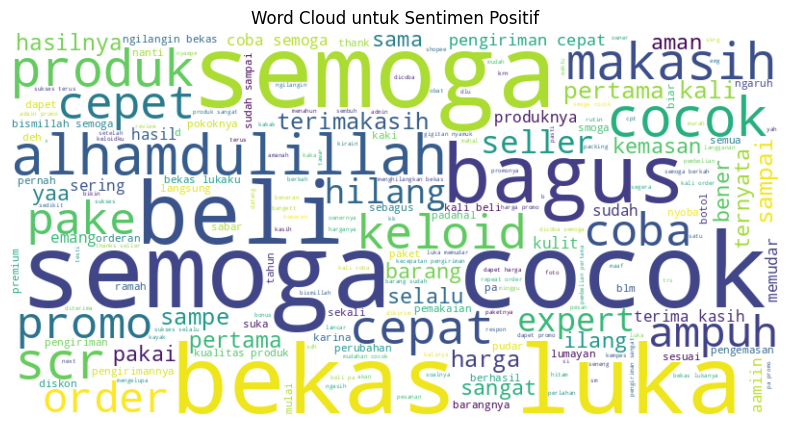

In [152]:
positif_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_content'])
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(positif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Positif')
plt.show()

Wordcloud untuk ulasan Negatif

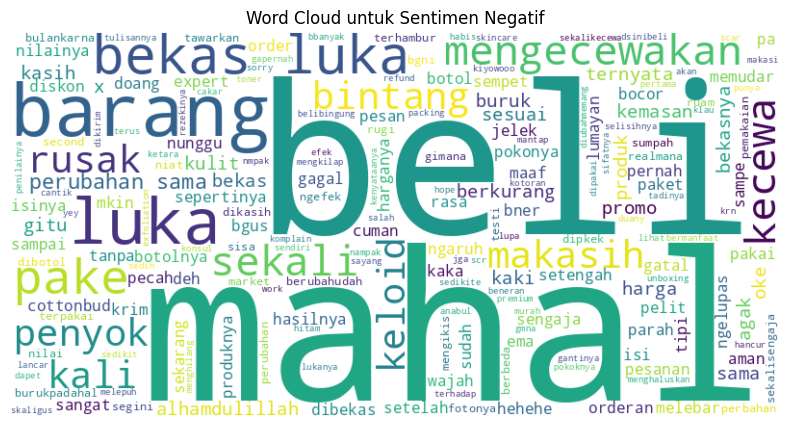

In [153]:
negatif_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_content'])
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(negatif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Negatif')
plt.show()

Bar Plot Kata-Kata yang Paling Sering Muncul

<ipython-input-155-f487968e8cce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_freq_df, x='Frekuensi', y='Kata', palette='viridis')


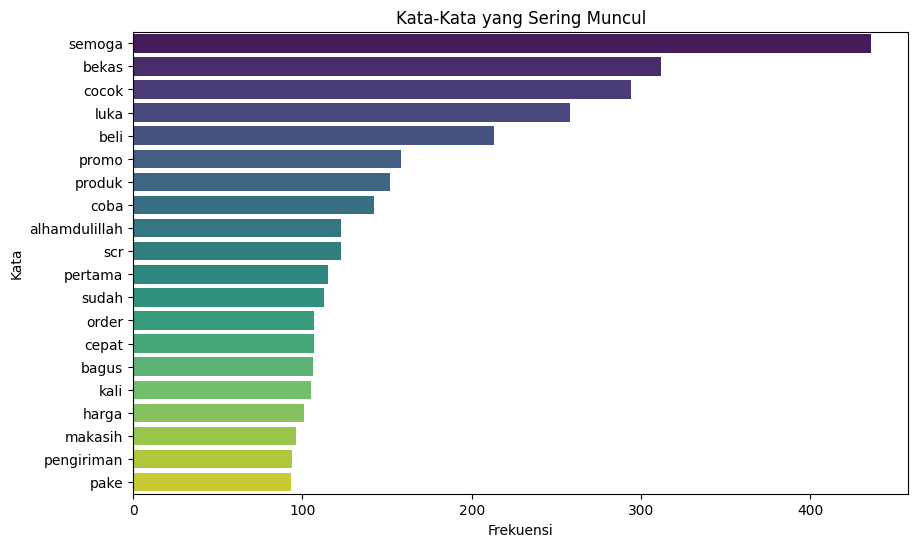

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=20)  # Top 20 kata paling sering muncul
word_counts = count_vectorizer.fit_transform(df['cleaned_content'])
word_counts_sum = word_counts.sum(axis=0)
words_freq = [(word, word_counts_sum[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq_df = pd.DataFrame(words_freq, columns=['Kata', 'Frekuensi'])

plt.figure(figsize=(10, 6))
sns.barplot(data=words_freq_df, x='Frekuensi', y='Kata', palette='viridis')
plt.title("Kata-Kata yang Sering Muncul")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()

Simpan model dan vectorizer untuk digunakan pada data baru

In [156]:
joblib.dump(best_nb_model, 'model_naive_bayes.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

Filter data yang belum diberi label (jika ada)

In [158]:
df_unlabeled = df[df['sentiment'].isna()]

Periksa apakah ada data tanpa label sebelum melakukan transformasi dan prediksi

In [159]:
if not df_unlabeled.empty:
    X_unlabeled = vectorizer.transform(df_unlabeled['cleaned_content'])
    df_unlabeled['predicted_sentiment'] = best_nb_model.predict(X_unlabeled)
    # Gabungkan data berlabel dan data yang diprediksi
    df_final = pd.concat([df, df_unlabeled], ignore_index=True)
else:
    print("Tidak ada data tanpa label yang perlu diprediksi.")
    df_final = df  # Jika tidak ada data tanpa label, langsung gunakan data asli

Tidak ada data tanpa label yang perlu diprediksi.


Simpan hasil prediksi ke file CSV

In [160]:
df_final.to_csv('hasil_prediksi_sentimen_nb.csv', index=False)
print("Hasil prediksi sentimen telah disimpan dalam file 'hasil_prediksi_sentimen_nb.csv'.")

Hasil prediksi sentimen telah disimpan dalam file 'hasil_prediksi_sentimen_nb.csv'.
